In [1]:
# 필요한 라이브러리 불러오기 및 설정

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mlxtend.preprocessing import minmax_scaling
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
plt.rcParams["font.family"] = 'Haansoft Dotum'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 10.
plt.rcParams['xtick.labelsize'] = 10.
plt.rcParams['ytick.labelsize'] = 10.
plt.rcParams['axes.labelsize'] = 18.
%matplotlib inline

## 문제 정의
### (1) 문제  
**"고등학생과 대학 진학 준비생들이 지원할 대학을 결정할 때 참고할 수 있는 대학 순위를 개발"**
- 수험생들은 어떤 대학을 선호할까?
- 수험생들의 대학 선호도는 대학의 어떠한 특징에 의해 영향을 받지 않을까?
- 수험생들의 대학 선호도에 영향을 주는 요인에는 어떤 것들이 있을까?
- 수험생들의 대학 선호도에 영향을 주는 대학의 특징이 존재한다면 각 특징들은 대학 선호도에 얼마나 영향을 줄까?

### (2) 해결방안  
- 상관관계 분석과 선형회귀 분석을 활용하여 수험생들의 대학 선호도에 영향을 주는 요인들을 밝히고 그 정도를 확인한다. 
- 도출된 회귀식을 바탕으로 '서울 소재 종합 대학'의 수험생 선호도를 예측한다.
- 예측한 선호도를 바탕으로 '서울 소재 종합 대학'의 순위를 결정한다.



## 1. 데이터 수집
- 데이터1 : 중앙일보 대학평가 지표를 참고하여 가능한 많은 데이터 수집 (2018년 대학알리미 공시 데이터)
- 데이터2 : 2014년 내일신문, 고등학생 대상 대학 선호도 조사 결과 응답률

In [2]:
# 데이터1
df = pd.read_csv('data/2018CSV.csv',encoding = 'cp949').iloc[:18]

# 데이터2
rank = [17.7, 17.1, 17.0, 15.1, 13.2, 12.5, 12.4 ,11.9, 11.5, 10.8, 9.4, 8.4, 8.4, 8.0, 7.8, 7.7, 7.6, 5.9]

In [3]:
# 분석에 사용할 데이터
df

,대학명,기숙사,교지확보율,교사확보율,연구비,논문실적,전임교원확보율,장학금,교육비,외부경력교원,...,교환학생,취업률,유지취업률,중도탈락학생비율,창업활동,현장실습,창업교육,신입생충원,경쟁률,기회균형
0,서울대학교,21.6,730.3,304.0,229759.00,3103.50,132.56,3116800.0,48272588.9,0.67,...,1169.0,68.3,93.6,1.1,16.0,100.0,15.0,99.8,6.8,4.9
1,연세대학교,35.2,214.1,277.3,202906.60,2070.13,108.65,3242900.0,30241700.0,0.30,...,3666.0,68.7,93.0,1.7,18.0,81.0,40.0,99.5,16.7,6.7
2,고려대학교,10.7,126.1,185.0,202769.94,1700.68,97.35,2985300.0,22859500.0,0.50,...,2581.0,68.1,93.7,1.8,42.0,101.0,64.0,99.9,7.3,5.1
3,성균관대학교,21.7,106.3,187.7,217252.90,1890.77,124.17,3471700.0,28081400.0,0.66,...,1005.0,75.1,94.7,2.0,14.0,418.0,81.0,99.9,22.6,5.2
4,한양대학교,12.2,72.8,165.4,170695.98,1316.03,94.13,3295100.0,21388000.0,0.77,...,3932.0,69.6,92.9,1.9,61.0,903.0,55.0,99.7,23.2,12.1
5,중앙대학교,11.6,28.8,129.6,108331.84,1293.48,95.39,2961600.0,15040500.0,0.22,...,1319.0,67.8,92.1,2.7,16.0,696.0,93.0,99.8,26.0,13.7
6,서강대학교,12.1,76.3,173.7,138146.42,410.22,73.39,2805800.0,18676800.0,0.40,...,817.0,67.3,94.4,2.6,7.0,260.0,26.0,99.9,26.7,7.2
7,경희대학교,21.4,223.2,147.7,104443.21,1659.04,93.94,2996100.0,17232200.0,0.43,...,2500.0,63.8,89.2,2.6,9.0,1552.0,112.0,99.7,19.0,11.5
8,이화여자대학교,21.4,104.1,188.4,107302.31,1127.73,91.82,3385500.0,19517100.0,0.52,...,1579.0,62.7,86.1,2.1,5.0,415.0,18.0,99.9,12.2,6.9
9,건국대학교,18.5,98.0,137.0,96278.38,908.76,77.74,3211600.0,16690800.0,0.36,...,1218.0,60.9,90.6,2.7,25.0,813.0,55.0,99.5,16.8,9.8


In [4]:
# 응답률 데이터
rank

[17.7,
 17.1,
 17.0,
 15.1,
 13.2,
 12.5,
 12.4,
 11.9,
 11.5,
 10.8,
 9.4,
 8.4,
 8.4,
 8.0,
 7.8,
 7.7,
 7.6,
 5.9]

## 2. 상관관계 분석
- 목적 : 각 대학이 갖는 특징과 수험생의 대학 선호도와의 상관관계(선형관계)가 있는지 파악

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
findfont: Font family ['Haansoft Dotum'] not found. Falling back to DejaVu Sans.


상관계수 : 0.5078121118251075
p-value : 0.031440722078573506


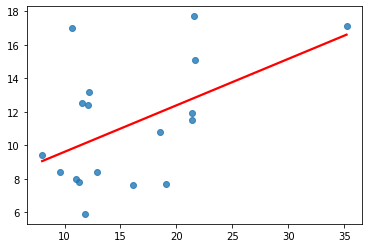

In [5]:
# 1.대학의 기숙사 수용률

x = list(df['기숙사'])
y = rank
sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})
cov = stats.pearsonr(x, y)
print("상관계수 : {}\np-value : {}".format(cov[0], cov[1]))

상관계수 : 0.3246193942959323
p-value : 0.18874404842294712


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


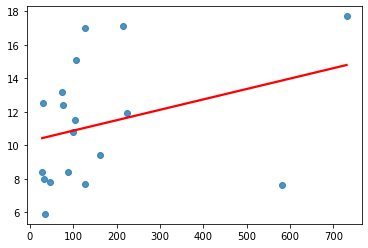

In [6]:
# 2.대학의 교지확보율

x = list(df['교지확보율'])
y = rank
sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})
cov = stats.pearsonr(x, y)
print("상관계수 : {}\np-value : {}".format(cov[0], cov[1]))

상관계수 : 0.8316115177065051
p-value : 1.8885116603782666e-05


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


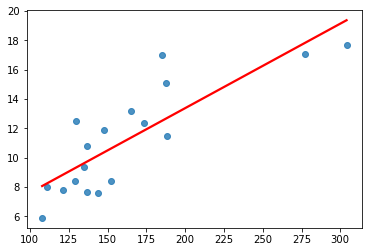

In [7]:
# 3.대학의 교사시설 확보율

x = list(df['교사확보율'])
y = rank
sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})
cov = stats.pearsonr(x, y)
print("상관계수 : {}\np-value : {}".format(cov[0], cov[1]))

상관계수 : 0.9136883243962994
p-value : 1.1780495871460595e-07


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


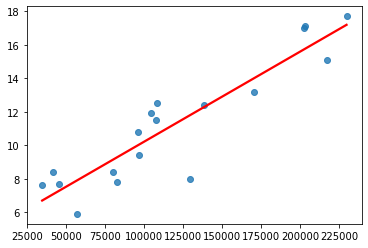

In [8]:
# 4.대학의 전임교원 1인당 평균 연구비 수혜

x = list(df['연구비'])
sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})
cov = stats.pearsonr(x, y)
print("상관계수 : {}\np-value : {}".format(cov[0], cov[1]))

상관계수 : 0.8431683426679604
p-value : 1.1112519344909254e-05


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


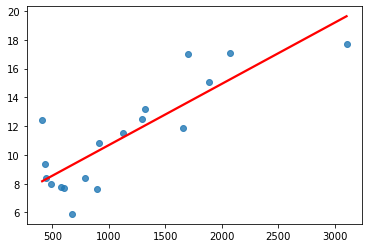

In [10]:
# 5.대학의 전임교원 1인당 평균 논문 실적

x = list(df['논문실적'])
sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})
cov = stats.pearsonr(x, y)
print("상관계수 : {}\np-value : {}".format(cov[0], cov[1]))

상관계수 : 0.7315531238413453
p-value : 0.0005599306029232948


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


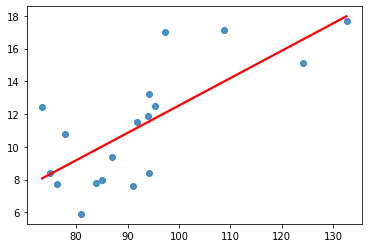

In [11]:
# 6.대학의 학생정원 기준 전임교원 확보율

x = list(df['전임교원확보율'])
sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})
cov = stats.pearsonr(x, y)
print("상관계수 : {}\np-value : {}".format(cov[0], cov[1]))

상관계수 : -0.030674896636419924
p-value : 0.9038279749609751


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


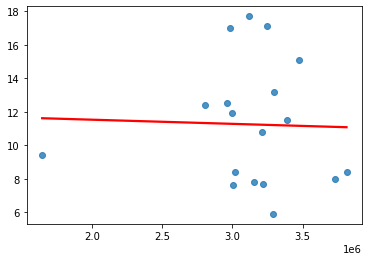

In [12]:
# 7.대학의 학생 1인당 평균 장학금 수혜
x = list(df['장학금'])
sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})
cov = stats.pearsonr(x, y)
print("상관계수 : {}\np-value : {}".format(cov[0], cov[1]))

상관계수 : 0.8230063052887995
p-value : 2.733867049848683e-05


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


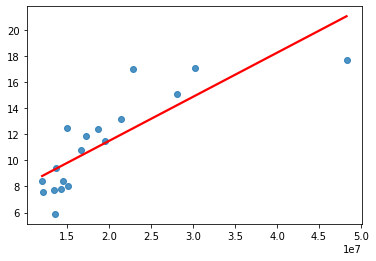

In [13]:
# 8.대학의 학생 1인당 평균 교육비

x = list(df['교육비'])
sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})
cov = stats.pearsonr(x, y)
print("상관계수 : {}\np-value : {}".format(cov[0], cov[1]))

상관계수 : 0.1390227675791892
p-value : 0.5822075890581984


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


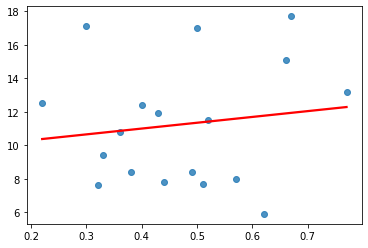

In [14]:
# 9.대학의 최근 5년간 외부경력 교원 임용률

x = list(df['외부경력교원'])
sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})
cov = stats.pearsonr(x, y)
print("상관계수 : {}\np-value : {}".format(cov[0], cov[1]))

상관계수 : 0.18060639191763336
p-value : 0.4732697440963027


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


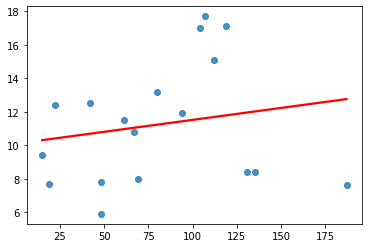

In [15]:
# 10.대학의 외국인 교수 고용 현황

x = list(df['외국인교수'])
sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})
cov = stats.pearsonr(x, y)
print("상관계수 : {}\np-value : {}".format(cov[0], cov[1]))

상관계수 : 0.28269990885179336
p-value : 0.2556773193784628


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


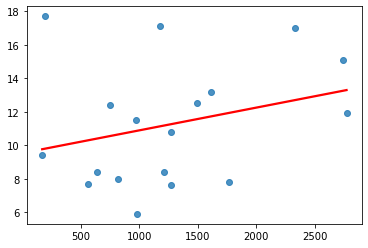

In [16]:
# 11.대학의 학사학위 과정 외국인학생 현황

x = list(df['외국인학생'])
sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})
cov = stats.pearsonr(x, y)
print("상관계수 : {}\np-value : {}".format(cov[0], cov[1]))

상관계수 : 0.4590633175600132
p-value : 0.05531930122969125


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


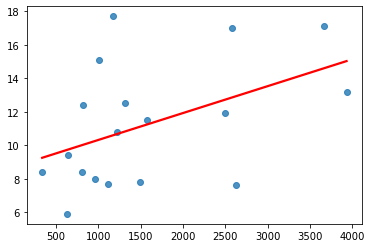

In [17]:
# 12.대학의 외국대학과의 학점교류 현황

x = list(df['교환학생'])
sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})
cov = stats.pearsonr(x, y)
print("상관계수 : {}\np-value : {}".format(cov[0], cov[1]))

상관계수 : 0.59280468515544
p-value : 0.009521864463866811


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


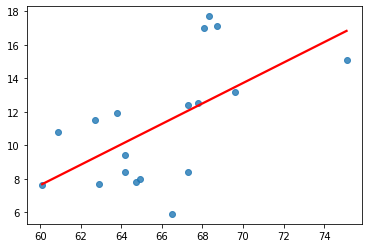

In [18]:
# 13.대학의 졸업생 취업률

x = list(df['취업률'])
sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})
cov = stats.pearsonr(x, y)
print("상관계수 : {}\np-value : {}".format(cov[0], cov[1]))

상관계수 : 0.549683916467337
p-value : 0.018120519063958757


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


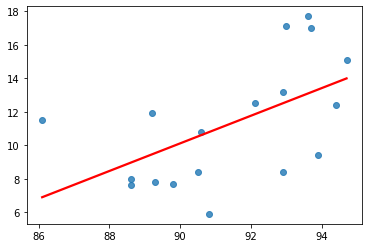

In [19]:
# 14.대학의 졸업생 유지취업률(2차)

x = list(df['유지취업률'])
sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})
cov = stats.pearsonr(x, y)
print("상관계수 : {}\np-value : {}".format(cov[0], cov[1]))

상관계수 : -0.8903269727822357
p-value : 7.422049666009161e-07


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


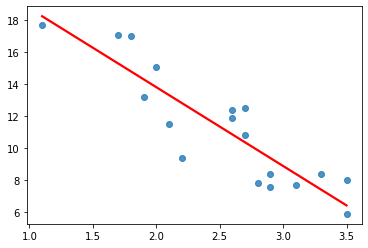

In [20]:
# 15.대학의 중도탈락 학생 비율

x = list(df['중도탈락학생비율'])
sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})
cov = stats.pearsonr(x, y)
print("상관계수 : {}\np-value : {}".format(cov[0], cov[1]))

상관계수 : 0.35306685919938896
p-value : 0.150669882278455


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


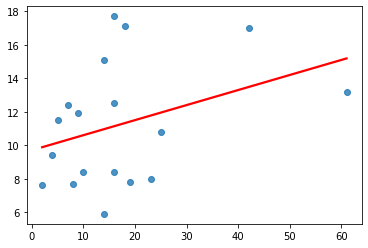

In [21]:
# 16.대학의 졸업생의 창업활동

x = list(df['창업활동'])
sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})
cov = stats.pearsonr(x, y)
print("상관계수 : {}\np-value : {}".format(cov[0], cov[1]))

상관계수 : -0.24748192059436536
p-value : 0.32211877163888486


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


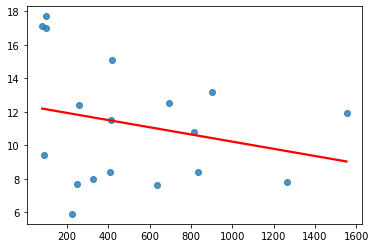

In [22]:
# 17.대학의 현장실습 참여 현황

x = list(df['현장실습'])
sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})
cov = stats.pearsonr(x, y)
print("상관계수 : {}\np-value : {}".format(cov[0], cov[1]))

상관계수 : -0.26238163226351735
p-value : 0.2928705417938639


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


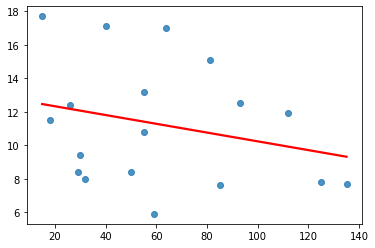

In [23]:
# 18.대학의 창업교육 지원 현황

x = list(df['창업교육'])
sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})
cov = stats.pearsonr(x, y)
print("상관계수 : {}\np-value : {}".format(cov[0], cov[1]))

상관계수 : 0.5486226071526153
p-value : 0.018390868524561038


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


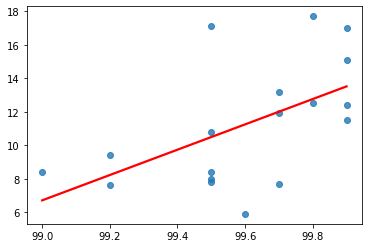

In [24]:
# 19.대학의 신입생 충원률

x = list(df['신입생충원'])
sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})
cov = stats.pearsonr(x, y)
print("상관계수 : {}\np-value : {}".format(cov[0], cov[1]))

상관계수 : 0.09177303146244575
p-value : 0.7172226714050693


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


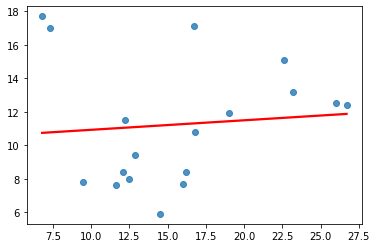

In [25]:
# 20.대학의 입학 경쟁률

x = list(df['경쟁률'])
sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})
cov = stats.pearsonr(x, y)
print("상관계수 : {}\np-value : {}".format(cov[0], cov[1]))

상관계수 : -0.6065075239698123
p-value : 0.007617833559959068


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


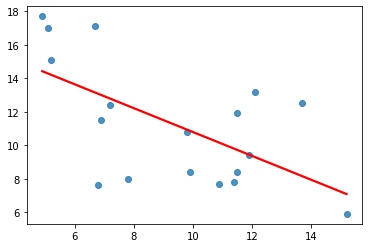

In [26]:
# 21.대학의 기회균형 선발 비율

x = list(df['기회균형'])
sns.regplot(x, y, ci = None, line_kws = {'color' : 'red'})
cov = stats.pearsonr(x, y)
print("상관계수 : {}\np-value : {}".format(cov[0], cov[1]))

### 2-1. 선형회귀분석에 사용할 변수 선택 (유의성 고려 X)
* 양 또는 음의 상관관계를 보이는 항목들 선택
* 상관관계가 거의 없는 '장학금', '경쟁률' 항목만 제거

In [27]:
# 선택한 항목들

col = [c for c in df.columns if c != '장학금' and c != '경쟁률' and c != '대학명']

In [28]:
data_fail = df[col]
data_fail

,기숙사,교지확보율,교사확보율,연구비,논문실적,전임교원확보율,교육비,외부경력교원,외국인교수,외국인학생,교환학생,취업률,유지취업률,중도탈락학생비율,창업활동,현장실습,창업교육,신입생충원,기회균형
0,21.6,730.3,304.0,229759.00,3103.50,132.56,48272588.9,0.67,107.0,197.0,1169.0,68.3,93.6,1.1,16.0,100.0,15.0,99.8,4.9
1,35.2,214.1,277.3,202906.60,2070.13,108.65,30241700.0,0.30,119.0,1177.0,3666.0,68.7,93.0,1.7,18.0,81.0,40.0,99.5,6.7
2,10.7,126.1,185.0,202769.94,1700.68,97.35,22859500.0,0.50,104.0,2327.0,2581.0,68.1,93.7,1.8,42.0,101.0,64.0,99.9,5.1
3,21.7,106.3,187.7,217252.90,1890.77,124.17,28081400.0,0.66,112.0,2742.0,1005.0,75.1,94.7,2.0,14.0,418.0,81.0,99.9,5.2
4,12.2,72.8,165.4,170695.98,1316.03,94.13,21388000.0,0.77,80.0,1608.0,3932.0,69.6,92.9,1.9,61.0,903.0,55.0,99.7,12.1
5,11.6,28.8,129.6,108331.84,1293.48,95.39,15040500.0,0.22,42.0,1492.0,1319.0,67.8,92.1,2.7,16.0,696.0,93.0,99.8,13.7
6,12.1,76.3,173.7,138146.42,410.22,73.39,18676800.0,0.40,22.0,752.0,817.0,67.3,94.4,2.6,7.0,260.0,26.0,99.9,7.2
7,21.4,223.2,147.7,104443.21,1659.04,93.94,17232200.0,0.43,94.0,2770.0,2500.0,63.8,89.2,2.6,9.0,1552.0,112.0,99.7,11.5
8,21.4,104.1,188.4,107302.31,1127.73,91.82,19517100.0,0.52,61.0,969.0,1579.0,62.7,86.1,2.1,5.0,415.0,18.0,99.9,6.9
9,18.5,98.0,137.0,96278.38,908.76,77.74,16690800.0,0.36,67.0,1272.0,1218.0,60.9,90.6,2.7,25.0,813.0,55.0,99.5,9.8


## 3. 선형회귀분석
- 최소제곱법 방식(OLS), 다중선형회귀

### 3-1. 데이터 정규화
- 1. 현재 데이터의 각 항목들은 비율, 금액, 사람수 등 다양한 단위로 구성
- 2. 금액의 경우 절대적인 값의 크기가 다른 값들에 비해 크므로 선형회귀분석 시 회귀식이 편향될 수 있음
- 항목들 간 비교와 선형회귀분석의 정확도를 위해 항목들을 정규화할 필요가 있다. (값의 범위를 0 ~ 1 사이로 고정) (단, '대학명' 항목은 제외)
- 정규화 이후에도 데이터의 분포는 전과 동일 (값의 범위만 변경됨)
- MIN - MAX 정규화 사용

In [29]:
# '대학명'을 제외한 데이터의 모든 항목들에 min-max scaling

data_fail_norm = data_fail.copy()
for col in data_fail_norm.columns:
    if col=='대학명':
        continue
    else:
        data_fail_norm[col] = minmax_scaling(data_fail[col],columns=[0])

C:\Users\user\anaconda3\lib\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


In [30]:
# 정규화한 데이터

data_fail_norm

,기숙사,교지확보율,교사확보율,연구비,논문실적,전임교원확보율,교육비,외부경력교원,외국인교수,외국인학생,교환학생,취업률,유지취업률,중도탈락학생비율,창업활동,현장실습,창업교육,신입생충원,기회균형
0,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.818182,0.534884,0.010765,0.231646,0.546667,0.872093,0.000000,0.237288,0.012916,0.000000,0.888889,0.000000
1,1.000000,0.264986,0.863845,0.862378,0.616315,0.595910,0.502566,0.145455,0.604651,0.387543,0.926029,0.573333,0.802326,0.250000,0.271186,0.000000,0.208333,0.555556,0.174757
2,0.099265,0.139684,0.393167,0.861678,0.479141,0.404935,0.298907,0.509091,0.517442,0.829681,0.624305,0.533333,0.883721,0.291667,0.677966,0.013596,0.408333,1.000000,0.019417
3,0.503676,0.111491,0.406935,0.935905,0.549720,0.858205,0.442968,0.800000,0.563953,0.989235,0.186040,1.000000,1.000000,0.375000,0.203390,0.229096,0.550000,1.000000,0.029126
4,0.154412,0.063790,0.293218,0.697295,0.336322,0.350515,0.258311,1.000000,0.377907,0.553249,1.000000,0.633333,0.790698,0.333333,1.000000,0.558804,0.333333,0.777778,0.699029
5,0.132353,0.001139,0.110658,0.377672,0.327950,0.371810,0.083197,0.000000,0.156977,0.508651,0.273359,0.513333,0.697674,0.666667,0.237288,0.418083,0.650000,0.888889,0.854369
6,0.150735,0.068774,0.335543,0.530475,0.000000,0.000000,0.183515,0.327273,0.040698,0.224145,0.133760,0.480000,0.965116,0.625000,0.084746,0.121686,0.091667,1.000000,0.223301
7,0.492647,0.277944,0.202958,0.357742,0.463680,0.347304,0.143661,0.381818,0.459302,1.000000,0.601780,0.246667,0.360465,0.625000,0.118644,1.000000,0.808333,0.777778,0.640777
8,0.492647,0.108358,0.410505,0.372396,0.266408,0.311475,0.206697,0.545455,0.267442,0.307574,0.345662,0.173333,0.000000,0.416667,0.050847,0.227056,0.025000,1.000000,0.194175
9,0.386029,0.099673,0.148394,0.315897,0.185105,0.073517,0.128725,0.254545,0.302326,0.424068,0.245273,0.053333,0.523256,0.666667,0.389831,0.497621,0.333333,0.555556,0.475728


In [31]:
# 모델 학습

first_test = data_fail_norm.copy()
x = first_test
y = rank

model_first = LinearRegression()
model_first.fit(x,y)

LinearRegression()

In [33]:
# 회귀식의 기울기

model_first.coef_

array([-0.91725493, -4.67228452, -0.78279637,  2.26553429, 13.50522401,
       -1.82347648, -4.68199861, -1.32967242,  0.04130948, -3.23905999,
        2.29747415, -1.25637984,  4.25914509, -2.2546124 , -1.29384865,
        1.97365249, -0.57078926,  2.10366704, -4.25139286])

In [32]:
# 회귀식의 절편

model_first.intercept_

10.300957104723945

### 도출된 회귀식 : 
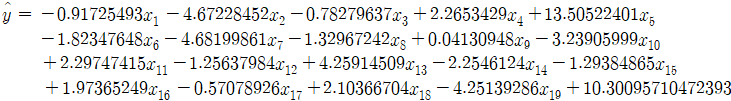

## 4. 결과 및 한계
- 도출된 회귀식을 바탕으로 선호도를 예측하고 대학순위를 산정한다. ==>>> 적절한가?

### (1) 상관관계 분석이 유의미한지 판단하지 않았다. 
- 대학의 전임교원 확보율은 고등학생의 대학 선호도와 상관관계가 있지만 이는 단순한 우연의 결과일 수 있다.
- 상관관계가 통계적으로 유의미한지 검토할 필요가 있다.

### (2) 각각의 독립변수와 종속변수의 관계는 확인했지만 독립변수 간의 관계는 확인하지 않았다.
- 다중공선성이 존재할 수 있다. 다중공선성 : 회귀 분석에서 사용된 모형의 일부 독립변수가 다른 독립변수와 상관 정도가 높아, 데이터 분석 시 부정적인 영향을 미치는 현상
- 독립변수와 종속변수 사이의 관계에 영향을 주는 제 3의 요인이 또 다른 독립변수로 존재할 수 있다.
- ex) 아이스크림의 판매량이 늘어나면 익사자가 늘어난다. 하지만 아이스크림의 판매량이 늘어난다는 것은 날씨가 더워진다는 것을 의미. 즉, 날씨가 더워져 사람들이 물놀이를 많이 감으로써 익사자가 증가함. 이 경우 아이스크림 판매량과 기온을 독립변수로 설정하고 익사자 수를 종속변수로 설정하여 선형회귀분석을 진행하는 경우 다중공선성이 발생
- 변수들 간의 독립성을 보장해야 한다.

### (3) 선형회귀 분석이 유의미한지 확인하지 않았다 .
- 회귀식을 도출했다 하더라도 그 회귀식은 유의미하지 않을 수 있다.
- 회귀식의 도출에서 끝나는 것이 아니라 분석이 유의미했는지 평가할 필요가 있다.

## 해결방안
- 1. 상관관계의 통계적 유의성 확인
- 2. 독립변수 간의 관계를 파악하여 다중공선성의 발생을 방지
- 3. 회귀분석의 결과를 들여다봄으로써 선형회귀분석과 도출된 회귀식이 유효한지 확인

## 5. 상관관계 유의성 검사 (상관관계의 통계적 유의성 확인)

In [35]:
# 상관관계 분석 결과, 상관성이 있고 통계적 유의성이 검증된 항목들 (p-value < 0.05)

new_col = ['기숙사',  '교사확보율', '연구비', '논문실적', '전임교원확보율', '교육비', '취업률', '유지취업률', '중도탈락학생비율', '신입생충원', '기회균형']

## 6. 독립변수 간의 관계 확인

In [36]:
# 독립변수들 간의 상관계수

data_test = data_fail_norm[new_col]

data_test.corr()

,기숙사,교사확보율,연구비,논문실적,전임교원확보율,교육비,취업률,유지취업률,중도탈락학생비율,신입생충원,기회균형
기숙사,1.000000,0.693873,0.385483,0.606652,0.480073,0.540144,0.116559,-0.039985,-0.465281,0.189709,-0.440493
교사확보율,0.693873,1.000000,0.740970,0.830823,0.734385,0.913090,0.392224,0.393709,-0.851623,0.300393,-0.666768
연구비,0.385483,0.740970,1.000000,0.774832,0.767790,0.839822,0.741736,0.556954,-0.797157,0.578454,-0.597986
논문실적,0.606652,0.830823,0.774832,1.000000,0.906193,0.903496,0.490297,0.306073,-0.790864,0.458084,-0.493356
전임교원확보율,0.480073,0.734385,0.767790,0.906193,1.000000,0.851826,0.631280,0.336893,-0.715860,0.372123,-0.508117
교육비,0.540144,0.913090,0.839822,0.903496,0.851826,1.000000,0.529637,0.423854,-0.817661,0.447354,-0.600225
취업률,0.116559,0.392224,0.741736,0.490297,0.631280,0.529637,1.000000,0.676433,-0.432605,0.492934,-0.205046
유지취업률,-0.039985,0.393709,0.556954,0.306073,0.336893,0.423854,0.676433,1.000000,-0.484674,0.096191,-0.173471
중도탈락학생비율,-0.465281,-0.851623,-0.797157,-0.790864,-0.715860,-0.817661,-0.432605,-0.484674,1.000000,-0.371212,0.561085
신입생충원,0.189709,0.300393,0.578454,0.458084,0.372123,0.447354,0.492934,0.096191,-0.371212,1.000000,-0.259235


In [38]:
# 독립변수 간 상관관계
# 상관계수가 큰 경우가 존재. 변수 간 독립성이 보장되지 않는다는 것을 암시

x = data_test['연구비']
y = data_test['논문실적']
cov = stats.pearsonr(x, y)
cov

(0.7748315552255189, 0.00015932883085482852)

In [39]:
# 분산팽창요인(VIF)을 이용하여 다중공선성을 일으키는 요인 찾기

data_test['rank'] = rank
features = "+".join(new_col)

# get y and X dataframes based on this regression:
y, X = dmatrices('rank ~' + features, data_test, return_type='dataframe')


C:\Users\user\AppData\Local\Temp/ipykernel_23528/3054855490.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['rank'] = rank


In [40]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [41]:
vif.round(1)

,VIF,features
0,235.7,Intercept
1,3.6,기숙사
2,25.8,교사확보율
3,13.4,연구비
4,17.6,논문실적
5,20.3,전임교원확보율
6,23.9,교육비
7,12.6,취업률
8,4.9,유지취업률
9,9.0,중도탈락학생비율


In [42]:
# VIF Factor가 10 이상이면 다중공선성을 일으키는 변수로 판단 (절편 제외)
# >>> 변수들을 제거, 대체해가면서 최적의 독립변수 목록을 선정

a = ['기숙사', '교사확보율', '연구비', '논문실적', '전임교원확보율', '교육비', '취업률', '유지취업률', '중도탈락학생비율', '신입생충원', '기회균형']
b = ['연구비', '중도탈락학생비율']
features = "+".join(b)

# get y and X dataframes based on this regression:
y, X = dmatrices('rank ~' + features, data_test, return_type='dataframe')


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,VIF Factor,features
0,33.291990,Intercept
1,2.743179,연구비
2,2.743179,중도탈락학생비율


In [43]:
# 분석에 활용할 항목들 결정

new_col = ['연구비', '중도탈락학생비율']

## 7. 선형회귀분석

In [44]:
second_test = data_test[new_col].copy()

In [45]:
second_test

,연구비,중도탈락학생비율
0,1.000000,0.000000
1,0.862378,0.250000
2,0.861678,0.291667
3,0.935905,0.375000
4,0.697295,0.333333
5,0.377672,0.666667
6,0.530475,0.625000
7,0.357742,0.625000
8,0.372396,0.416667
9,0.315897,0.666667


In [46]:
# 모델 학습 

model = smf.ols("rank ~  연구비 + 중도탈락학생비율", data = second_test).fit()

## 8. 모델 평가

In [47]:
model.summary()

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rank   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     72.97
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           1.87e-08
Time:                        16:17:27   Log-Likelihood:                -27.026
No. Observations:                  18   AIC:                             60.05
Df Residuals:                      15   BIC:                             62.72
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.9546      1.618      7.389      0.000       8.506      15.403
연구비            6.4231      1.499      4.285      0.001       3.228       9.618
중도탈락학생비율      -5.8958      1.732     -3.403      0.004      -9.588      -2.203
==============================================================================
Omnibus:                        1.128   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.569   Jarque-Bera (JB):                0.777
Skew:                          -0.018   Prob(JB):                        0.678
Kurtosis:                       1.983   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Adj.R-squared(조정된 결정계수)(다중선형회귀의 경우 선택) : 모델의 설명력 >>> '연구비'와 '중도탈락학생비율' 지표가 선호도의 89%를 설명할 수 있음.
- Prob (F-statistic) : 모델의 통계적 유의성 검정 >>> 통계적으로 유의함
- coef(회귀계수) : 독립변수의 기울기와 절편
- P>|t| : 각 독립변수의 통계적 유의성 검정 >>> 각 독립변수가 통계적으로 유의함

### 도출된 회귀식 : 
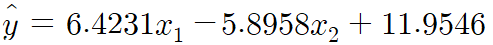

In [48]:
# 예측값과 실제값 비교
 
pre = model.predict(second_test)

pred = pd.DataFrame({'대학명' : [df['대학명'][3],df['대학명'][8]], '실제값' : [rank[3], rank[8]], '예측값' : [pre[3],pre[8]]})
pred

,대학명,실제값,예측값
0,성균관대학교,15.1,15.755092
1,이화여자대학교,11.5,11.889981


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

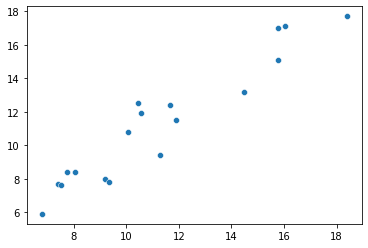

In [49]:
# X : 예측한 선호도 응답률, Y : 실제 선호도 응답률

sns.scatterplot(pre,rank)

## 9. 모델 적용

In [51]:
df2 = pd.read_csv('data/2020CSV.csv', encoding = 'cp949')
df3 = df2.drop([28, 30, 31, 18, 7, 29, 19], axis = 0)
df3

,대학명,기숙사,교지확보율,교사확보율,연구비,교수당 외부 연구비,교수당 자체 연구비,논문실적,국내 학술지 논문,국제학술지 논문,...,교환학생,취업률,유지취업률,중도탈락학생비율,창업활동,현장실습,창업교육,신입생충원,경쟁률,기회균형
0,상명대학교,10.3,98.8,112.9,86722.02,84884.01,1839.02,359.76,231.91,127.85,...,416.0,64.3,82.8,3.8,7.0,186.0,21.0,99.0,10.0,10.3
1,서강대학교,12.8,82.5,173.0,120825.04,114327.29,6500.38,385.42,195.85,189.57,...,944.0,70.4,95.1,3.1,5.0,300.0,29.0,99.5,23.2,8.6
2,서경대학교,5.0,29.2,138.7,28662.68,27491.09,474.92,191.01,164.02,26.99,...,77.0,70.2,86.7,5.4,6.0,NaN,18.0,99.8,19.8,9.1
3,서울여자대학교,12.1,115.7,128.7,28011.81,26528.70,2533.00,146.40,123.93,22.48,...,337.0,58.8,82.0,3.7,3.0,43.0,28.0,99.9,14.4,8.0
4,서울과학기술대학교,23.1,136.5,129.1,89612.19,83600.46,6011.74,419.71,186.31,233.40,...,754.0,66.7,87.4,3.2,31.0,624.0,82.0,100.0,12.2,15.5
5,서울대학교,21.8,730.1,306.5,236927.88,228138.11,8789.76,3058.85,806.04,2252.81,...,1207.0,70.1,92.6,1.3,13.0,55.0,12.0,70.1,6.3,4.8
6,서울시립대학교,11.4,161.1,153.0,95873.19,85790.56,10082.63,444.78,295.19,149.59,...,899.0,68.5,93.3,2.5,3.0,121.0,35.0,68.5,13.3,13.0
8,건국대학교,18.5,94.7,129.6,110939.33,102471.90,8467.43,926.07,450.11,475.96,...,1401.0,64.5,90.7,2.7,30.0,971.0,92.0,99.3,19.6,10.8
9,경희대학교,21.4,221.9,146.7,99872.72,94866.61,5006.09,1611.37,686.88,924.49,...,2319.0,68.3,89.7,2.8,29.0,1758.0,163.0,99.5,16.6,12.2
10,고려대학교,10.7,126.0,186.1,243223.80,226072.20,17151.60,1797.62,557.55,1240.07,...,2387.0,70.3,93.7,2.2,34.0,375.0,40.0,99.8,8.0,6.2


- 제거한 대학교 : '장로회신학대학교', '한국성서대학교', '총신대학교', 가톨릭대학교', '케이씨대학교', '서울한영대학교', '성공회대학교'
- 기존 대학 수 : 36개
- 제거한 대학 수 : 7개
- 분석 대상 대학 수 : 29개  

In [52]:
# 필요한 정보만 뽑아낸 뒤, 데이터 표준화

predict_data = df3[new_col].copy()

for c in predict_data.columns:
    predict_data[c] = minmax_scaling(predict_data[c], columns = [0])
predict_data

C:\Users\user\anaconda3\lib\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


,연구비,중도탈락학생비율
0,0.312940,0.595238
1,0.460701,0.428571
2,0.061381,0.976190
3,0.058561,0.571429
4,0.325462,0.452381
5,0.963750,0.000000
6,0.352590,0.285714
8,0.417868,0.333333
9,0.369919,0.357143
10,0.991029,0.214286


In [53]:
# 모델 적용 후 예측 결과 도출

x = predict_data

y_predict = model.predict(x)

In [54]:
# 순위를 적용하여 최종 결과 도출
result = pd.DataFrame({'name' : df3['대학명'], 'score' : y_predict})
result = result.sort_values(by = 'score', ascending = False)

r = [i for i in range(1, len(predict_data)+1)]

result['rank'] = r
result = result.set_index('rank')

## 10. 최종결과

In [55]:
result

,name,score
rank,,
1,서울대학교,18.144867
2,고려대학교,17.056695
3,성균관대학교,16.973942
4,연세대학교,16.870038
5,한양대학교,14.670885
6,이화여자대학교,13.452743
7,중앙대학교,13.388297
8,건국대학교,12.673369
9,서울시립대학교,12.534834
